<center>ASSIGNMENT 3 - Bhavya Nagpal (VIT)</center>
<style>
    .rendered_html p {
        font-size: 30px;
        text-align:center;
    }
</style>


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the Dataset

In [2]:
df=pd.read_csv("Housing.csv")

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


------

3. Perform Basic Viualisations

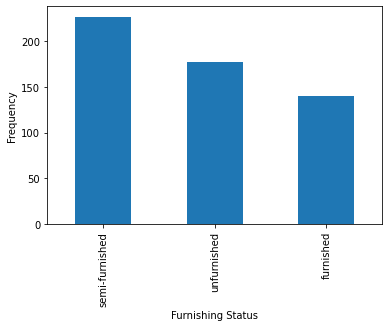

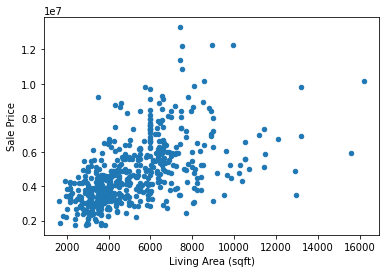

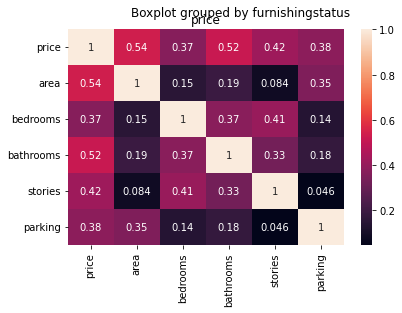

In [10]:
sale_price_distribution = df['price'].hist()
sale_price_distribution.set_xlabel('Sale Price')
sale_price_distribution.set_ylabel('Frequency')

overall_qual_distribution = df['furnishingstatus'].value_counts().plot(kind='bar')
overall_qual_distribution.set_xlabel('Furnishing Status')
overall_qual_distribution.set_ylabel('Frequency')

scatter_plot = df.plot.scatter(x='area', y='price')
scatter_plot.set_xlabel('Living Area (sqft)')
scatter_plot.set_ylabel('Sale Price')

box_plot = df.boxplot(column='price', by='furnishingstatus')

correlation_matrix = df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True)

# Display the plots and analysis results
plt.show()


-------

4. Perform Descriptive Statistics on the Dataset

In [9]:
descriptive_stats = df.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


------

5. Check for Missing Values and Deal with them

In [17]:
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


------

6. Find Outliers and Deal with them

In [19]:
numerical_variable = 'price'
Q1 = df[numerical_variable].quantile(0.25)
Q3 = df[numerical_variable].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = df[(df[numerical_variable] < lower_threshold) | (df[numerical_variable] > upper_threshold)]

df_cleaned = df.drop(outliers.index)

df.loc[df[numerical_variable] < lower_threshold, numerical_variable] = lower_threshold
df.loc[df[numerical_variable] > upper_threshold, numerical_variable] = upper_threshold

print(df_cleaned)


       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    9205000  7420         4          2        3      yes        no       no   
1    9205000  8960         4          4        4      yes        no       no   
2    9205000  9960         3          2        2      yes        no      yes   
3    9205000  7500         4          2        2      yes        no      yes   
4    9205000  7420         4          1        2      yes       yes      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  pa

------

7. Check for Categorical Columns and Encode them

In [25]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000,7420,4,2,3,1,0,0,0,1,2,0
1,9205000,8960,4,4,4,1,0,0,0,1,3,0
2,9205000,9960,3,2,2,1,0,1,0,0,2,1
3,9205000,7500,4,2,2,1,0,1,0,1,3,0
4,9205000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


------

8. Split the Data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1) 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (436, 11)
Shape of X_test: (109, 11)
Shape of y_train: (436,)
Shape of y_test: (109,)


-------

9. Scale the Independent Variables

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(df_scaled.head())


       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  furnishingstatus  
0        -0.219265         1.472618  1.517692         -1.406286  
1        -0.219265         1.472618  2.679409         -1.406286  
2        -0.219265        -0.679063  1.517692         -0.091662  
3        -0.219265         1.472618  2.679409         -1.406286  
4        -0.219265         1.472618  1.517692         -1.406286  


-------

11. Build, Test and Train the Model



In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

-------

12. Measure Performance using Metrics

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

Mean Squared Error: 1324678732320.3738
R2:  0.6721004490541829


<center>xxxx</center>